In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
import matplotlib.pyplot as plt

from src.models.HmmNormal import model, configurator, constrain_parameters
from amortizer import amortizer

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 100, 11)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from checkpoints/amortizer/history_50.pkl.
INFO:root:Networks loaded from checkpoints/amortizer/ckpt-50
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [2]:
df = configurator(model(1000))

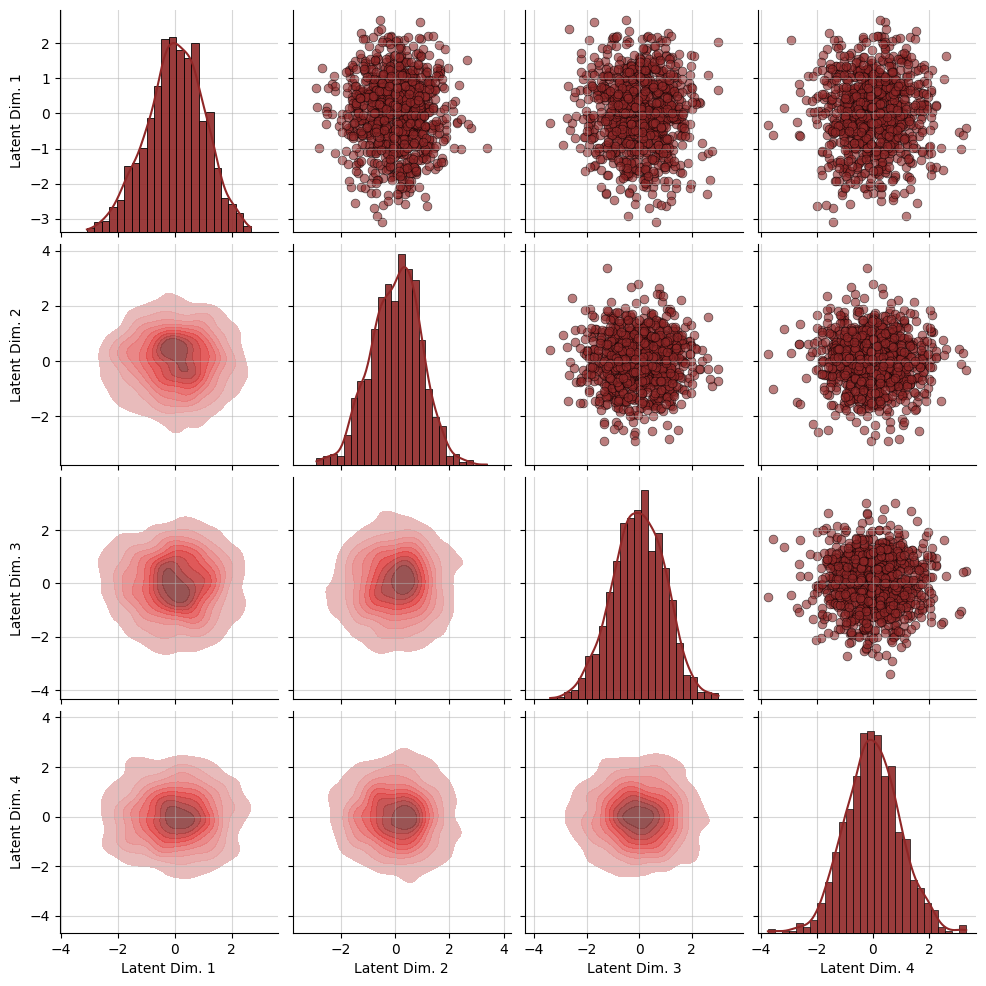

In [3]:
(z, _), _ = amortizer(df)
f = bf.diagnostics.plot_latent_space_2d(z)

## Calibration (parameter posterior approximator)

### Unconstrained space

In [4]:
prior = df['posterior_inputs']['parameters']
posterior = amortizer.amortized_posterior.sample(df['posterior_inputs'], n_samples=1000)

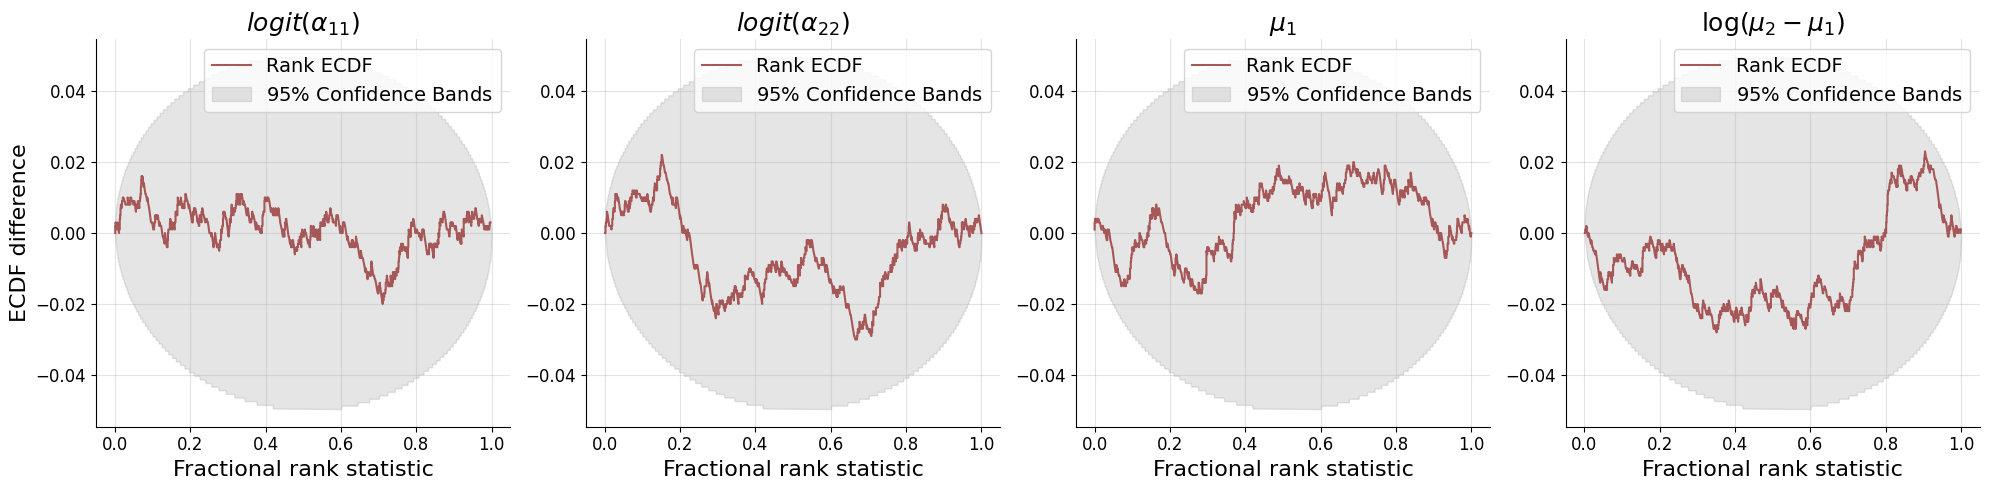

In [5]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, difference=True, param_names=model.param_names['unconstrained'])

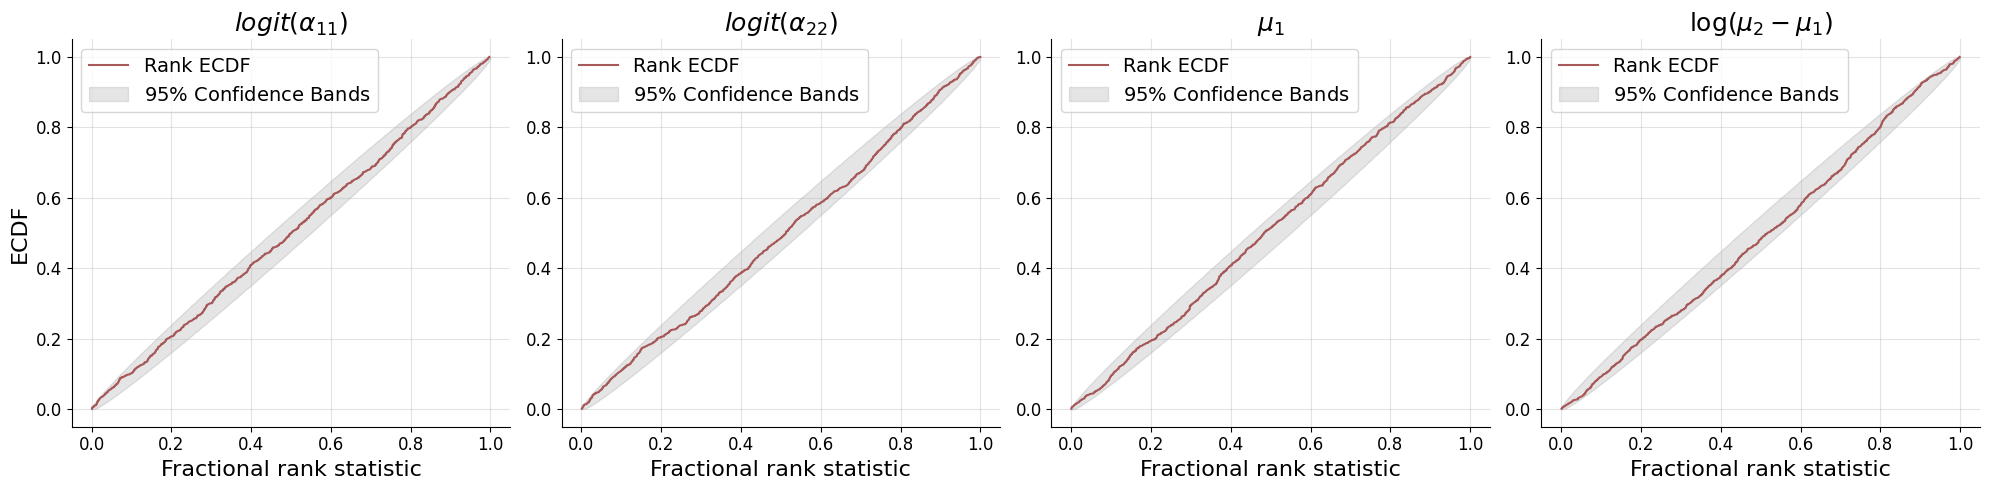

In [6]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, param_names=model.param_names['unconstrained'])

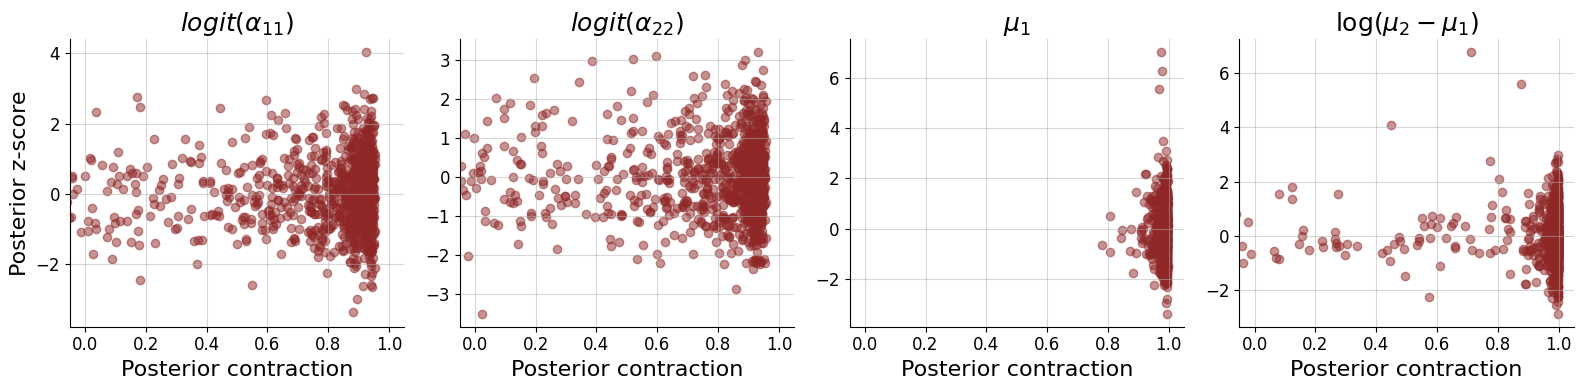

In [7]:
f = bf.diagnostics.plot_z_score_contraction(posterior, prior, param_names=model.param_names['unconstrained'])

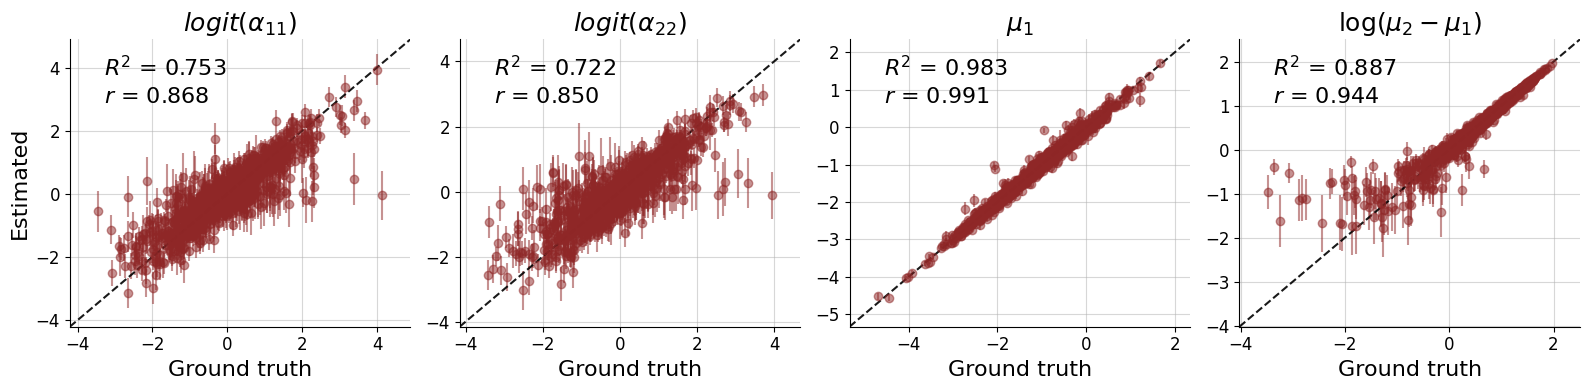

In [8]:
f = bf.diagnostics.plot_recovery(posterior, prior, param_names=model.param_names['unconstrained'])

### Constrained space

In [9]:
prior = constrain_parameters(prior)
posterior = constrain_parameters(posterior)

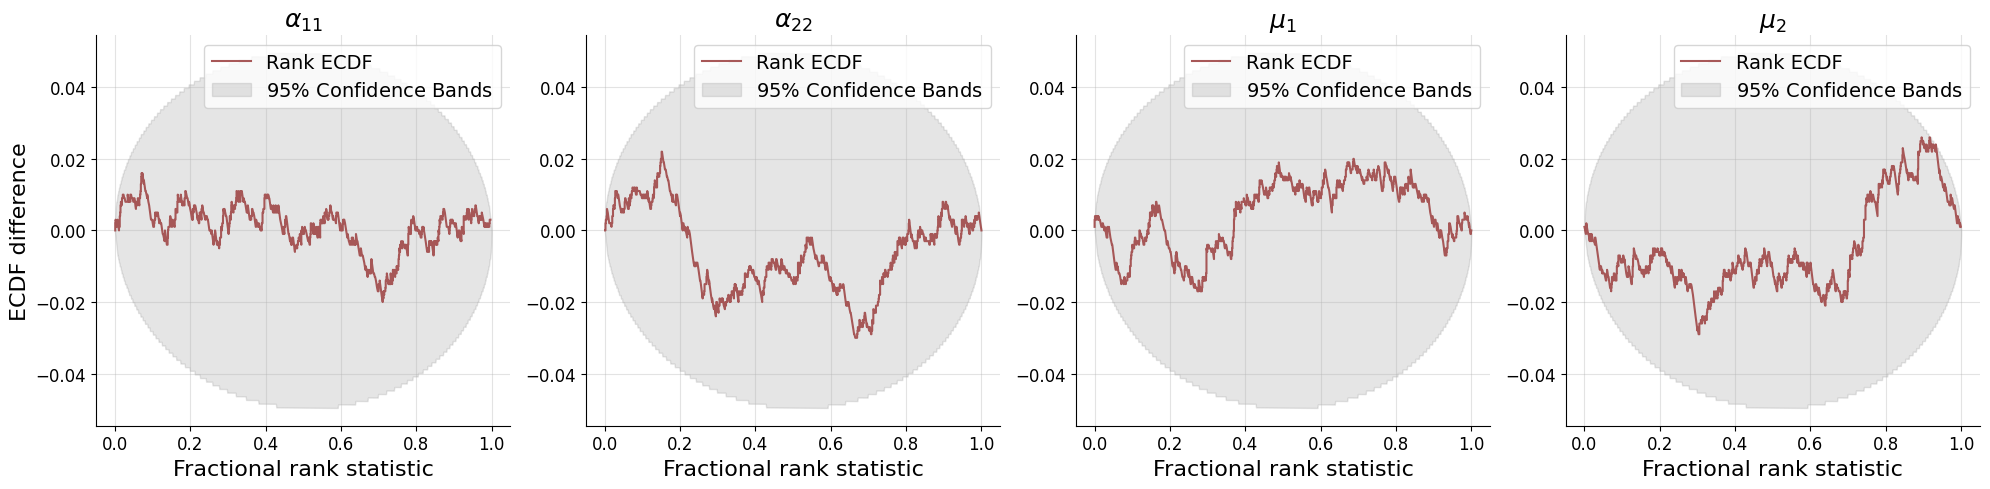

In [10]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, difference=True, param_names=model.param_names['constrained'])

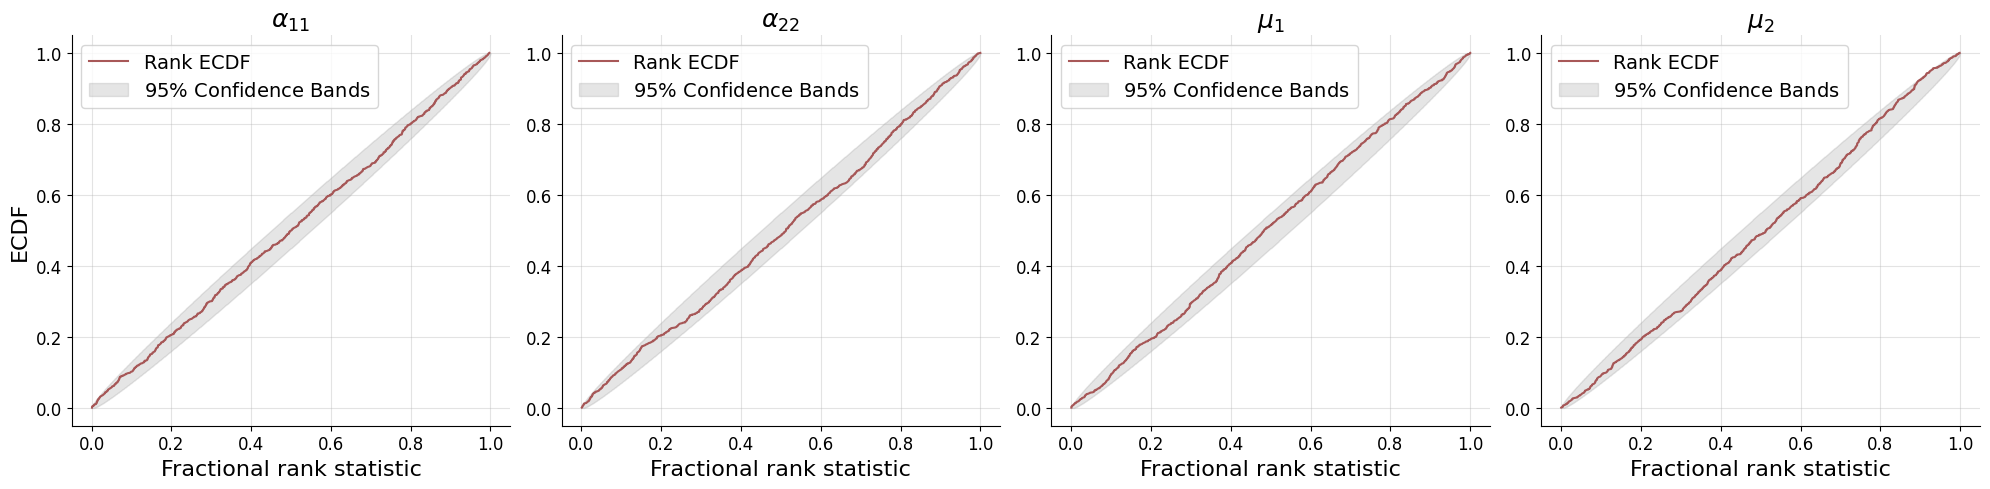

In [11]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, param_names=model.param_names['constrained'])

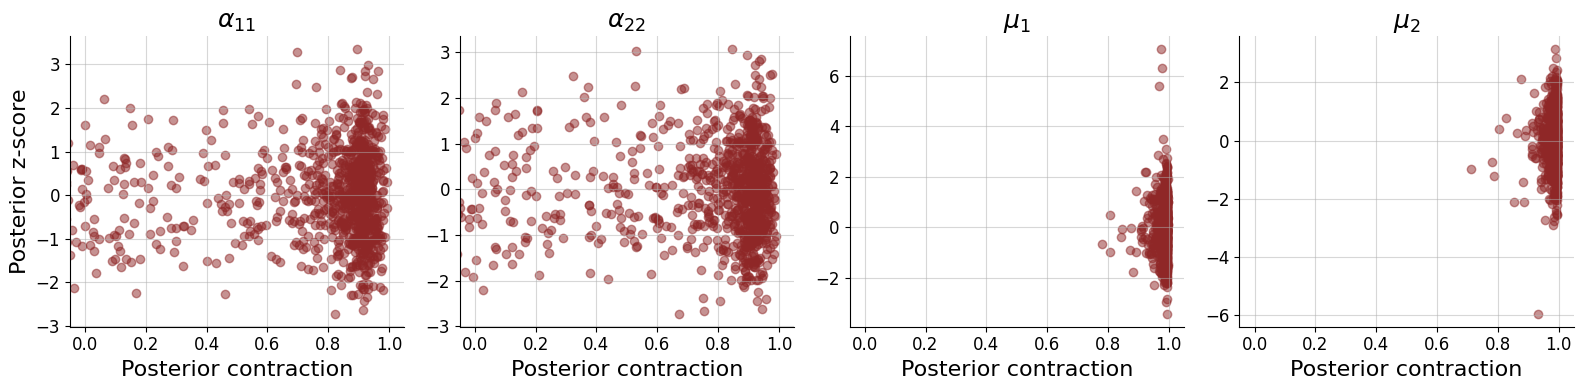

In [12]:
f = bf.diagnostics.plot_z_score_contraction(posterior, prior, param_names=model.param_names['constrained'])

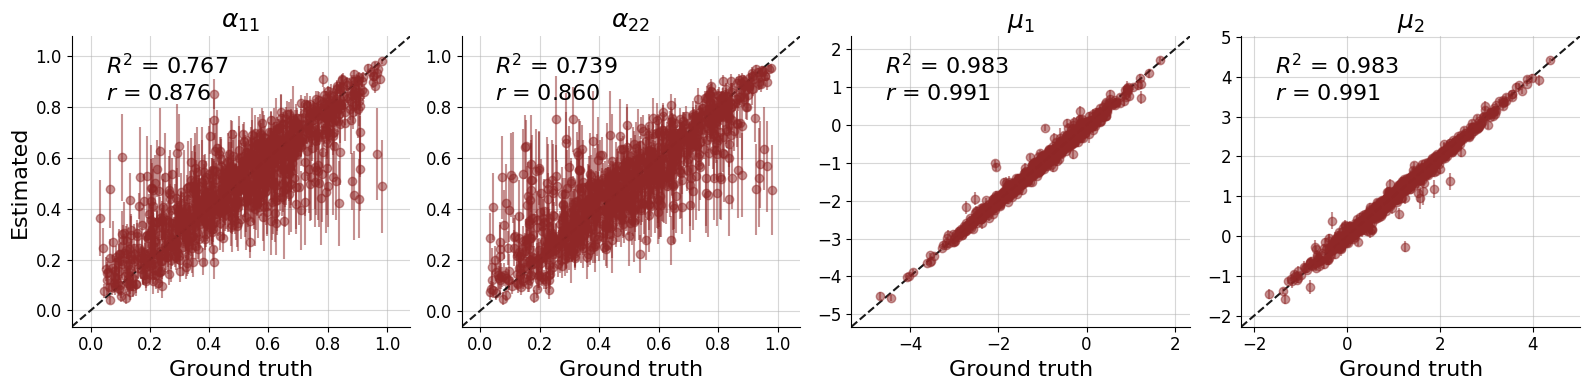

In [13]:
f = bf.diagnostics.plot_recovery(posterior, prior, param_names=model.param_names['constrained'])

## For publication

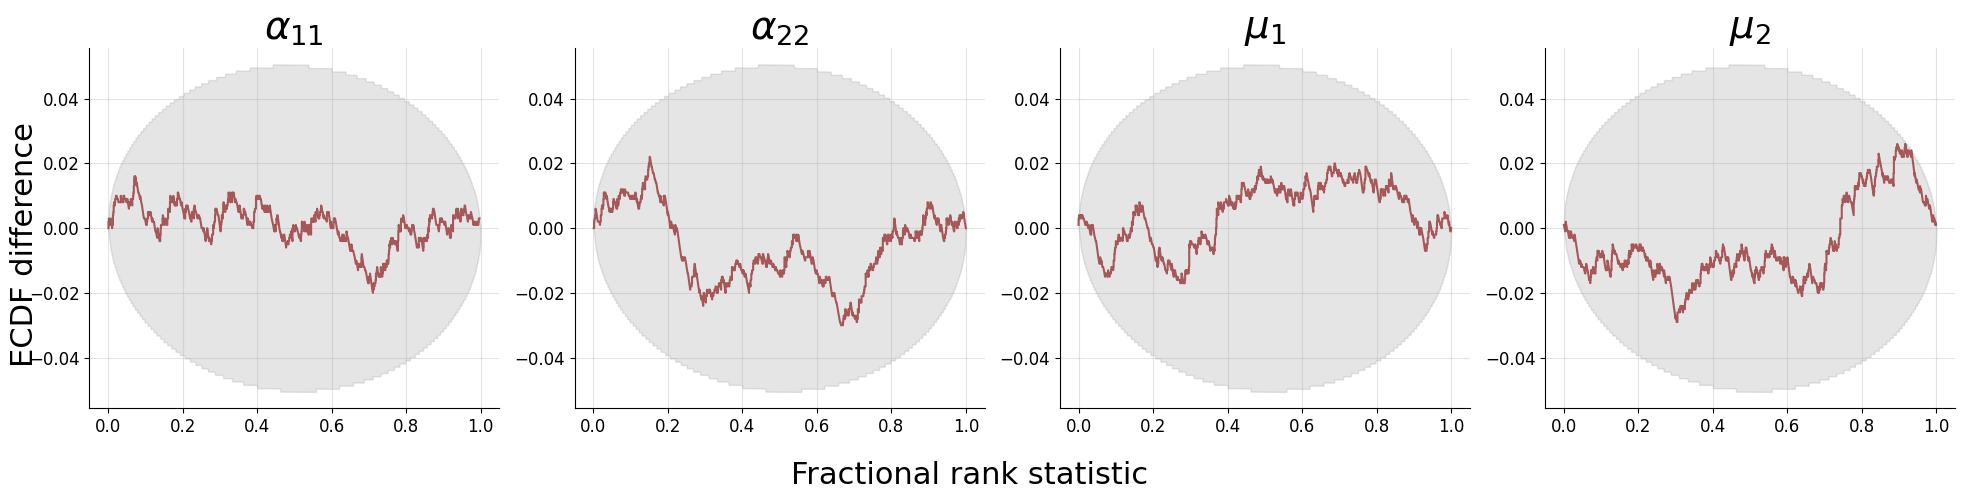

In [14]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, difference=True, param_names=model.param_names['constrained'])
axes = plt.gcf().get_axes()
for i, ax in enumerate(axes):
    ax.set_title(model.param_names['constrained'][i], fontsize=28)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.get_legend().remove()
f.supxlabel("Fractional rank statistic", fontsize=22)
f.supylabel("ECDF difference", fontsize=22)
f.tight_layout()

Now we check the recovery for different subsets of the true parameter space

In [15]:
small_diff = df['posterior_inputs']['parameters'][:,3] <= np.log(2/3)

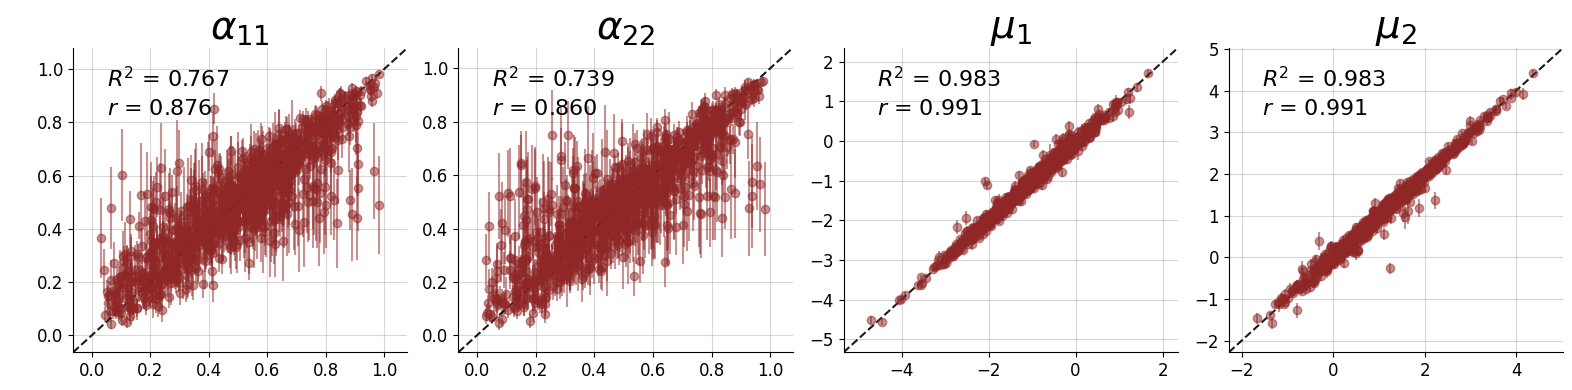

In [16]:
f = bf.diagnostics.plot_recovery(posterior, prior, param_names=model.param_names['constrained'])
axes = plt.gcf().get_axes()
for i, ax in enumerate(axes):
    ax.set_title(model.param_names['constrained'][i], fontsize=28)
    ax.set_xlabel("")
    ax.set_ylabel("")
f.supylabel(" ", fontsize=22)
f.tight_layout()

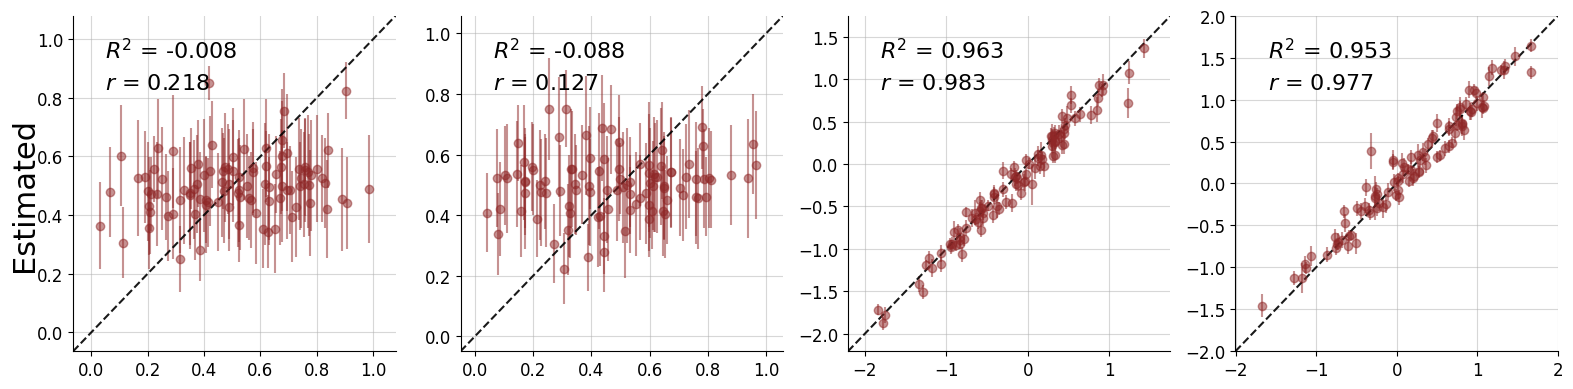

In [17]:
f = bf.diagnostics.plot_recovery(posterior[small_diff, ...], prior[small_diff, ...], param_names=['' for _ in range(4)])
axes = plt.gcf().get_axes()
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
f.supylabel("Estimated", fontsize=22)
f.tight_layout()

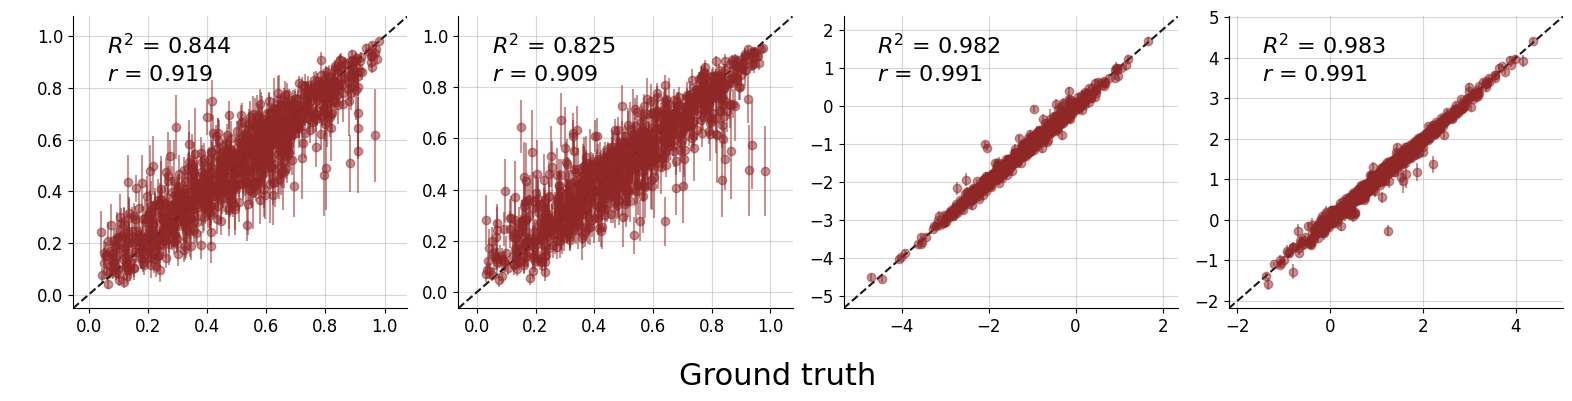

In [18]:
f = bf.diagnostics.plot_recovery(posterior[~small_diff, ...], prior[~small_diff,...], param_names=['' for _ in range(4)])
axes = plt.gcf().get_axes()
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
f.supylabel(" ", fontsize=22)
f.supxlabel("Ground truth", fontsize=22)
f.tight_layout()